### Packages Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pip install missingno
import missingno as msno
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import RFE,f_regression,SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
#pip install lightgbm
import lightgbm as lgb

### Dataset

In [2]:
demo = pd.read_excel('C:/Users/Nithin/Downloads/ML_Credit Card/Datasets/CustomerDemographics.xlsx')
behave = pd.read_excel('C:/Users/Nithin/Downloads/ML_Credit Card/Datasets/CustomerBehaviorData.xlsx')
consump = pd.read_excel('C:/Users/Nithin/Downloads/ML_Credit Card/Datasets/CreditConsumptionData.xlsx')

In [3]:
cust = pd.merge(demo,behave,on='ID',how = 'outer')
cust = pd.merge(cust,consump,on='ID',how = 'outer')
cust

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,7.0,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,14.0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,10.0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
19998,6821,current,M,32,LOW,6.0,8,619.0,0,17.0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [4]:
unseen = cust[cust.cc_cons.isna()]
cust = cust[-cust.cc_cons.isna()]

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            15000 non-null  int64  
 1   account_type                  15000 non-null  object 
 2   gender                        15000 non-null  object 
 3   age                           15000 non-null  int64  
 4   Income                        15000 non-null  object 
 5   Emp_Tenure_Years              15000 non-null  float64
 6   Tenure_with_Bank              15000 non-null  int64  
 7   region_code                   15000 non-null  float64
 8   NetBanking_Flag               15000 non-null  int64  
 9   Avg_days_between_transaction  14999 non-null  float64
 10  cc_cons_apr                   15000 non-null  float64
 11  dc_cons_apr                   15000 non-null  float64
 12  cc_cons_may                   15000 non-null  float64
 13 

In [6]:
cust.isnull().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    1
cc_cons_apr                     0
dc_cons_apr                     0
cc_cons_may                     0
dc_cons_may                     0
cc_cons_jun                     0
dc_cons_jun                     0
cc_count_apr                    1
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_active            0
vehicle_loan_active             0
personal_loan_closed            1
vehicle_loan_closed             0
investment_1                    0
investment_2                    0
investment_3  

### Categorical & Continuous Data

In [7]:
cust_cont = cust.select_dtypes(['float64','int64'])
cust_cat = cust.select_dtypes(['object'])

**--Continuous data prepration**

In [8]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max'])

In [9]:
cust_cont.apply(continuous_var_summary).head(8)

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,int64,int64,float64,int64,float64,int64,float64,float64,float64,float64,...,int64,int64,float64,float64,float64,int64,int64,float64,float64,float64
cardinality,15000,43,270,10,210,2,19,7408,3638,7461,...,31,57,4862,7533,7338,39,66,5348,5393,12260
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,14999,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000
nmiss,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0
sum,150481156,716859,227760.1,82650,8976232.0,10793,165733.0,269360875.785,122566474.3,245055819.935,...,178847,614953,857818585.48,1142398008.52,1177547451.85,299196,669718,788798143.17,236405030.79,827365948.0
mean,10032.077067,47.7906,15.184007,5.51,598.415467,0.719533,11.049603,17957.391719,8171.098287,16337.054662,...,11.923133,40.996867,57187.905699,76159.867235,78503.163457,19.9464,44.647867,52586.542878,15761.386145,55157.729867


**-- Outlier Treatment**

<AxesSubplot:>

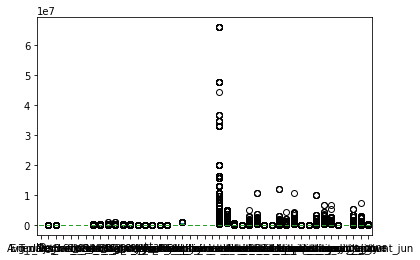

In [10]:
cust_cont.plot(kind='box')

In [11]:
cust_cont = cust_cont.apply(lambda x : x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

<AxesSubplot:>

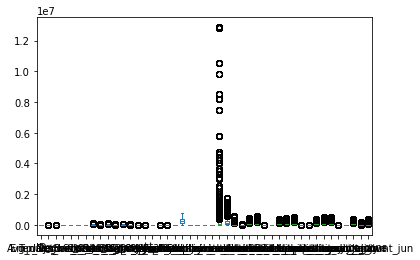

In [12]:
cust_cont.plot(kind='box')

In [13]:
cust_cont.apply(continuous_var_summary).round(2)

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
cardinality,14702,41,246,10,206,2,19,7264,3566,7322,...,30,56,4767,7392,7204,39,65,5240,5296,11990
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,14999,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,14999,15000
nmiss,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006667,0.0
sum,150484340.0,716960.0,221009.4,82650,8986357.0,10793,165733.0,261009570.79,114999391.67,235608697.265,...,178826.0,615013.0,746688103.965,1061193306.745,1093015360.87,299196,669232.0,720161404.19,153563467.62,826365410.0
mean,10032.289333,47.797333,14.73396,5.51,599.090467,0.719533,11.049603,17400.638053,7666.626111,15707.246484,...,11.921733,41.000867,49779.206931,70746.22045,72867.690725,19.9464,44.615467,48010.760279,10238.247058,55091.027333
std,5756.859052,30.580459,17.031901,2.865783,218.66277,0.449242,5.492379,21123.22462,10504.034191,20505.046326,...,16.838693,40.533357,56631.874128,79925.279803,86002.394017,27.200165,35.01155,57778.482365,21873.991759,97429.489575
var,33141426.139431,935.164471,290.085647,8.212714,47813.407176,0.201819,30.166229,446190618.330781,110334734.281088,420456924.812587,...,283.541577,1642.953063,3207169167.208548,6388050351.647221,7396411776.581479,739.848984,1225.808655,3338353024.410304,478471515.483333,9492505438.819309


<AxesSubplot:>

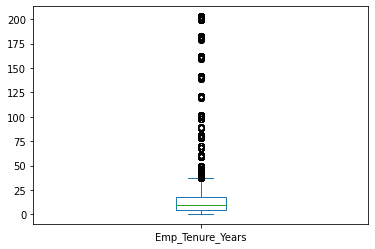

In [14]:
cust.Emp_Tenure_Years.plot.box()

In [15]:
#Outlier capping @ 90%
cust.Emp_Tenure_Years[cust.Emp_Tenure_Years >= 31] == 31

119      False
144      False
151      False
175      False
194      False
         ...  
15068    False
15078    False
15097    False
15101    False
15109    False
Name: Emp_Tenure_Years, Length: 1501, dtype: bool

<AxesSubplot:>

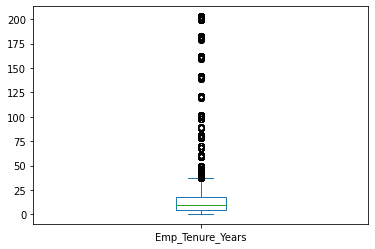

In [16]:
cust.Emp_Tenure_Years.plot.box()

**-- Missing Value Treatment**

In [17]:
def missing_imputation( x, stats = 'mean' ):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    return x

<AxesSubplot:>

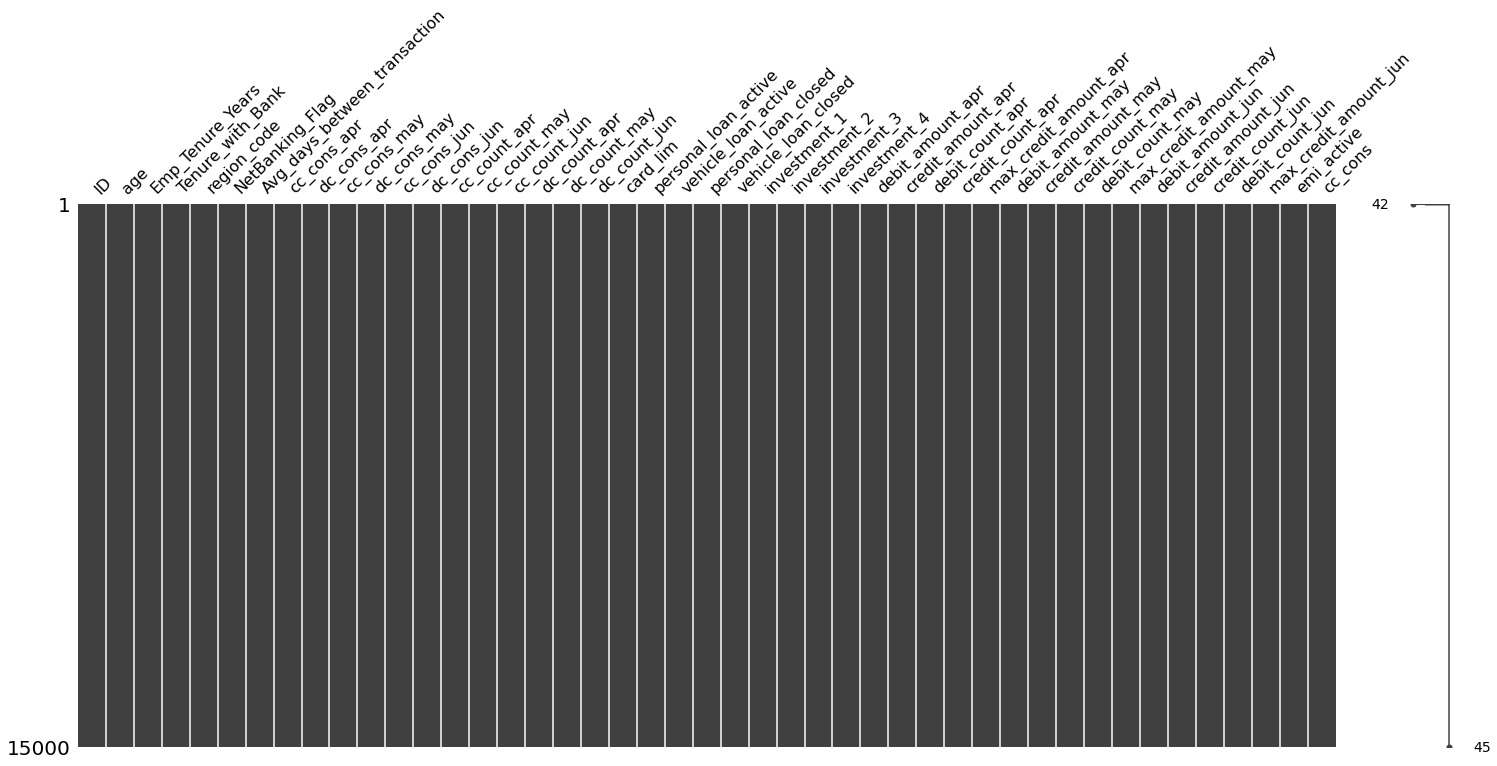

In [18]:
msno.matrix(cust_cont)

In [19]:
cust_cont = cust_cont.apply(missing_imputation).round(2)

<AxesSubplot:>

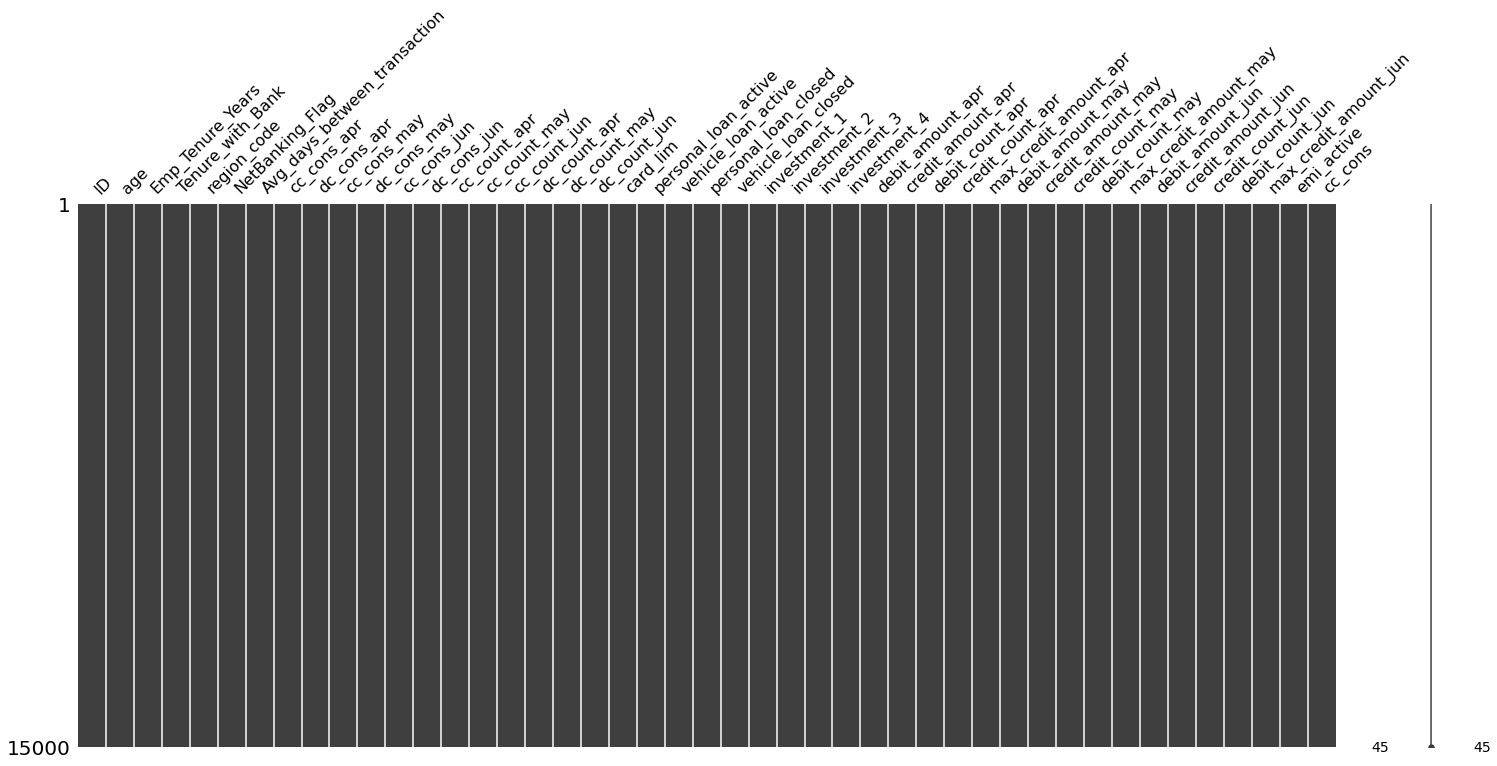

In [20]:
msno.matrix(cust_cont)

In [21]:
cust_cont.apply(continuous_var_summary).round(2).head(10)

,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
dtype,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
cardinality,14702,41,246,10,206,2,20,7264,3566,7321,...,30,56,4767,7392,7204,39,65,5240,5297,11990
n_tot,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
n,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,150484340.0,716960.0,221009.4,82650,8986357.0,10793,165744.05,261009571.01,114999391.67,235608696.61,...,178826.0,615013.0,746688104.13,1061193306.79,1093015360.87,299196,669232.0,720161404.19,153573705.39,826365410.0
mean,10032.289333,47.797333,14.73396,5.51,599.090467,0.719533,11.049603,17400.638067,7666.626111,15707.246441,...,11.921733,41.000867,49779.206942,70746.220453,72867.690725,19.9464,44.615467,48010.760279,10238.247026,55091.027333
std,5756.859052,30.580459,17.031901,2.865783,218.66277,0.449242,5.492196,21123.224606,10504.034191,20505.046114,...,16.838693,40.533357,56631.874118,79925.27982,86002.394017,27.200165,35.01155,57778.482365,21873.26258,97429.489575
var,33141426.139431,935.164471,290.085647,8.212714,47813.407176,0.201819,30.164217,446190617.768511,110334734.281088,420456916.13397,...,283.541577,1642.953063,3207169166.11621,6388050354.330499,7396411776.581479,739.848984,1225.808655,3338353024.410302,478439615.909205,9492505438.819309


**-- Categorical data prepration**

In [22]:
def categorical_var_summary( x ):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [23]:
cust_cat.apply(categorical_var_summary).round(2)

,account_type,gender,Income,loan_enq
N,15000,15000,15000,14998
NMISS,0,0,0,2
MODE,current,M,MEDIUM,Y
FREQ,12727,12945,9612,14998
PERCENT,84.85,86.3,64.08,100.0


In [24]:
cust.loan_enq.value_counts()

Y    14998
Name: loan_enq, dtype: int64

In [25]:
cust_cat.drop(columns='loan_enq',inplace=True)

C:\Users\Nithin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [27]:
cust_cat.Income = np.where(cust_cat.Income=='LOW',0,np.where(cust_cat.Income=='MEDIUM',1,2))
cust_cat['gender_M'] = pd.get_dummies(cust_cat.gender,prefix='gender',drop_first=True)
cust_cat['account_type_saving'] = pd.get_dummies(cust_cat.account_type,prefix='account_type',drop_first=True)

C:\Users\Nithin\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Nithin\AppData\Local\Temp/ipykernel_16500/3693143556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_cat['gender_M'] = pd.get_dummies(cust_cat.gender,prefix='gender',drop_first=True)
C:\Users\Nithin\AppData\Local\Temp/ipykernel_16500/3693143556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [28]:
cust_cat

,account_type,gender,Income,gender_M,account_type_saving
111,current,M,1,1,0
112,current,M,2,1,0
113,current,M,1,1,0
114,current,F,1,0,0
115,current,M,1,1,0
...,...,...,...,...,...
15106,current,F,0,0,0
15107,current,M,1,1,0
15108,current,M,1,1,0
15109,current,M,1,1,0


**--Final Dataset**

In [29]:
cust_final = pd.concat([cust_cont,cust_cat],axis=1)

**--Droping unnecessary columns**

In [30]:
# High cardinality columns
cust_final.drop(columns=['ID','account_type','gender'],inplace=True)

In [31]:
drp = []
for i in cust_final.columns:
    if len(cust_final[i].unique()) < 2:
        drp.append(i)
print(drp)
cust_final.drop(drp,axis=1,inplace=True)

['personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed']


In [32]:
cust_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 111 to 15110
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           15000 non-null  float64
 1   Emp_Tenure_Years              15000 non-null  float64
 2   Tenure_with_Bank              15000 non-null  int64  
 3   region_code                   15000 non-null  float64
 4   NetBanking_Flag               15000 non-null  int64  
 5   Avg_days_between_transaction  15000 non-null  float64
 6   cc_cons_apr                   15000 non-null  float64
 7   dc_cons_apr                   15000 non-null  float64
 8   cc_cons_may                   15000 non-null  float64
 9   dc_cons_may                   15000 non-null  float64
 10  cc_cons_jun                   15000 non-null  float64
 11  dc_cons_jun                   15000 non-null  float64
 12  cc_count_apr                  15000 non-null  float64
 13 

**--Corelation Matrixx**

<AxesSubplot:>

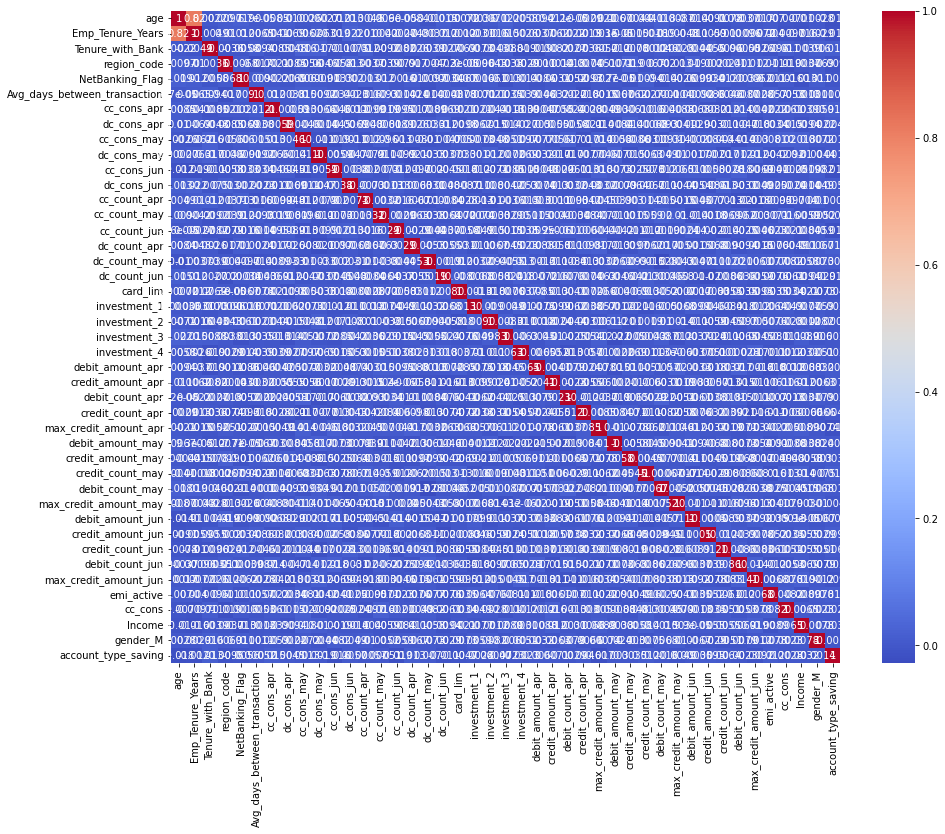

In [33]:
plt.figure(figsize= (15,12))
sns.heatmap(cust_final.corr(),cmap='coolwarm',annot=True)

**--Assumption Check**

C:\Users\Nithin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cc_cons', ylabel='Density'>

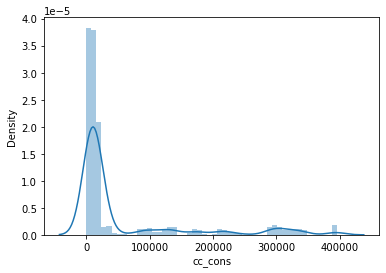

In [34]:
#Check if y variable is normally distributed
sns.distplot(cust_final.cc_cons)

### Train Test Split Data

In [35]:
X = cust_final.drop('cc_cons',axis=1)
Y = np.log(cust_final.cc_cons)

In [36]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=123)

### Scaling the Dataset

In [37]:
sc = StandardScaler()
train_x_std = sc.fit_transform(train_x)
train_x_std = pd.DataFrame(train_x_std,columns=train_x.columns)
test_x_std = sc.transform(test_x)
test_x_std = pd.DataFrame(test_x_std,columns=test_x.columns)

### Feature Selection

**--SelectKBest**

In [38]:
kb = SelectKBest(f_regression,k=15)
kb = kb.fit(train_x,train_y)
kb.scores_

array([9.06304527e-01, 6.57129576e-01, 3.05432328e-01, 1.50225917e+00,
       2.95151133e-01, 7.33730776e-02, 1.17787246e-01, 4.73349521e-02,
       3.53331025e+00, 7.01078250e-01, 8.74685039e-02, 6.83638913e-01,
       5.02553731e-01, 3.44942261e+00, 1.77226020e-01, 2.18593066e-01,
       3.04046992e-01, 4.44958346e-01, 1.36032111e-01, 5.32747853e-02,
       3.01307011e+00, 8.16278110e-01, 4.58944297e-01, 1.88402380e-02,
       3.26357714e+00, 6.81733458e-01, 1.79617932e-01, 6.68100032e-03,
       7.97066019e-01, 1.71898210e+00, 9.17912981e-01, 5.23081647e-01,
       7.24686347e-05, 1.02650034e-02, 3.56250810e-01, 3.46416585e+00,
       3.71619998e-01, 1.56889178e-01, 3.98432217e+00, 5.64738897e-02,
       7.41016382e-02, 2.09851854e+00])

In [39]:
feat_kb = list(train_x.columns[kb.get_support()])
feat_kb

['age',
 'region_code',
 'cc_cons_may',
 'dc_cons_may',
 'dc_cons_jun',
 'cc_count_may',
 'investment_2',
 'investment_3',
 'credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'credit_count_may',
 'credit_count_jun',
 'emi_active',
 'account_type_saving']

**--Random Forest**

In [40]:
reg = RandomForestRegressor(n_jobs=-1)
rfe = RFE(estimator=reg,n_features_to_select=15,step=1)
rfe = rfe.fit(train_x,train_y)

In [41]:
feat_rfe = list(train_x_std.columns[rfe.get_support()])
feat_rfe

['cc_cons_apr',
 'cc_cons_may',
 'dc_cons_may',
 'dc_cons_jun',
 'investment_2',
 'debit_amount_apr',
 'credit_amount_apr',
 'max_credit_amount_apr',
 'debit_amount_may',
 'credit_amount_may',
 'max_credit_amount_may',
 'debit_amount_jun',
 'credit_amount_jun',
 'max_credit_amount_jun',
 'emi_active']

In [42]:
feat = list(set(feat_kb+feat_rfe))

**--VIF**

In [43]:
feature=feat.copy()
a=np.inf
while a>=5:
    vif=[variance_inflation_factor(train_x[feature].values,i) for i in range(train_x[feature].shape[1])]
    vif=pd.Series(vif,name='VIF')
    fet=pd.Series(train_x[feature].columns,name='Feature')
    vifdf=pd.concat([vif,fet],axis=1).sort_values(by="VIF")
    a=vifdf['VIF'].max()
    if a<=5:
        break
    feature=list(vifdf[:-1]["Feature"])

In [44]:
train_x = train_x[feature]
test_x = test_x[feature]

### Random Forest Regressor

In [45]:
M_rf = RandomForestRegressor(n_jobs=1)
M_rf.fit(train_x,train_y)

RandomForestRegressor(n_jobs=1)

In [46]:
train_pred = M_rf.predict(train_x)
test_pred = M_rf.predict(test_x)

**--Model Scoring**

In [47]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 0.4408254470208802
MSE: 0.3575623112696959
RMSE: 0.5979651421861444


In [48]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.168144744675159
MSE: 2.531299984364523
RMSE: 1.5910059661624538


**--Hyper Parameter Tuning**

In [49]:
params = {'n_estimators':[50,100] ,
          'max_depth':[2,3,4], 
          'max_features':[4,5,6]}

In [50]:
grd = GridSearchCV(RandomForestRegressor(),param_grid=params,n_jobs=1,cv=3,
                   scoring='neg_mean_absolute_percentage_error')
grd.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [2, 3, 4], 'max_features': [4, 5, 6],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_percentage_error')

In [51]:
grd.best_params_

{'max_depth': 2, 'max_features': 4, 'n_estimators': 100}

**--Best Hyper paramters**

In [52]:
M_rf = RandomForestRegressor(n_estimators=100,n_jobs=1,max_depth=2,max_features=5)
M_rf.fit(train_x,train_y)

RandomForestRegressor(max_depth=2, max_features=5, n_jobs=1)

In [53]:
train_pred = M_rf.predict(train_x)
test_pred = M_rf.predict(test_x)

**--Model Scoring**

In [54]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 1.1448718286758148
MSE: 2.4858254776073
RMSE: 1.5766500809016883


In [55]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.1441710074749467
MSE: 2.4864281672125235
RMSE: 1.57684119911059


### Decision Tree Regressor

In [56]:
M_dt = DecisionTreeRegressor()
M_dt.fit(train_x,train_y)

DecisionTreeRegressor()

In [57]:
train_pred = M_dt.predict(train_x)
test_pred = M_dt.predict(test_x)

**--Model Scoring**

In [58]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [59]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.7431079274112562
MSE: 5.123220359990391
RMSE: 2.263453193682253


**--Hyper Parameter Tuning**

In [60]:
params = {
    'max_depth':[3,4,5],
    'max_features':[11,12,13],
    'min_impurity_decrease':[0.00005,0.0001,0.0002,0.0005,0.001,0.0015,0.002,0.005,0.01]}

In [61]:
grd = GridSearchCV(DecisionTreeRegressor(),param_grid=params,n_jobs=1,cv=3,
                   scoring='neg_mean_absolute_percentage_error')
grd.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [11, 12, 13],
                         'min_impurity_decrease': [5e-05, 0.0001, 0.0002,
                                                   0.0005, 0.001, 0.0015, 0.002,
                                                   0.005, 0.01]},
             scoring='neg_mean_absolute_percentage_error')

In [62]:
grd.best_params_

{'max_depth': 3, 'max_features': 11, 'min_impurity_decrease': 0.005}

**--Best Hyper paramters**

In [63]:
M_dt = DecisionTreeRegressor(max_depth=3,max_features=11,min_impurity_decrease=0.005)
M_dt.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=3, max_features=11, min_impurity_decrease=0.005)

In [64]:
train_pred = M_rf.predict(train_x)
test_pred = M_rf.predict(test_x)

**--Model Scoring**

In [65]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 1.1448718286758148
MSE: 2.4858254776073
RMSE: 1.5766500809016883


In [66]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.1441710074749467
MSE: 2.4864281672125235
RMSE: 1.57684119911059


### KNN Regressor

In [69]:
M_knn = KNeighborsRegressor(n_jobs=1)
M_knn.fit(train_x,train_y)

KNeighborsRegressor(n_jobs=1)

In [70]:
train_pred = M_knn.predict(train_x)
test_pred = M_knn.predict(test_x)

**--Model Scoring**

In [71]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 1.0983179728047308
MSE: 2.0118126160654763
RMSE: 1.4183838042171366


In [72]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.3289499970950764
MSE: 2.9924337250298194
RMSE: 1.7298652331987656


**--Hyper Parameter Tuning**

In [73]:
params = {'n_neighbors':[5,6,7,8,9,10],
          'weights':['uniform','distance']}

In [74]:
grd = GridSearchCV(KNeighborsRegressor(),param_grid=params,n_jobs=1,cv=3,
                   scoring='neg_mean_absolute_percentage_error')
grd.fit(train_x,train_y)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error')

In [75]:
grd.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

**--Best Hyper paramters**

In [76]:
M_knn = KNeighborsRegressor(n_neighbors=10,weights='uniform')
M_knn.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=10)

In [77]:
train_pred = M_knn.predict(train_x)
test_pred = M_knn.predict(test_x)

**--Model Scoring**

In [78]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 1.143069582971737
MSE: 2.2695908381915
RMSE: 1.5065161260973943


In [79]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.2528002284553317
MSE: 2.754386446710111
RMSE: 1.6596344316475573


### XGBoost Regressor

In [82]:
M_xg = XGBRegressor()
M_xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [85]:
train_pred = M_xg.predict(train_x)
test_pred = M_xg.predict(test_x)

**--Model Scoring**

In [86]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 0.6255693062836527
MSE: 0.7317122021686315
RMSE: 0.8554017782122221


In [87]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.2774621995846154
MSE: 2.8363625115868087
RMSE: 1.6841503827113566


**--Hyper Parameter Tuning**

In [88]:
params =  {'n_estimators':[50,100],
            'learning_rate': [0.1,0.2,0.3],
            'gamma':[0.1,0.2],
            'max_depth':[2,3,4]}

In [89]:
grd = GridSearchCV(XGBRegressor(),param_grid=params,n_jobs=1,cv=3,
                   scoring='neg_mean_absolute_percentage_error')
grd.fit(train_x,train_y)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=1,
             param_grid={'gamma': [0.1, 0.2], 'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_percentage_error')

In [90]:
grd.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}

**--Best Hyper paramters**

In [91]:
M_xg = XGBRegressor(gamma=0.1,learning_rate=0.1,max_depth=2,n_estimators=50)
M_xg.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [93]:
train_pred = M_xg.predict(train_x)
test_pred = M_xg.predict(test_x)

**--Model Scoring**

In [94]:
#Evaluation --> Train
print('MAE:', metrics.mean_absolute_error(train_y, train_pred))
print('MSE:', metrics.mean_squared_error(train_y, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(train_y, train_pred)))

MAE: 1.1324327923297566
MSE: 2.4554845798078784
RMSE: 1.566998589599837


In [95]:
#Evaluation --> Test
print('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print('MSE:', metrics.mean_squared_error(test_y, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 1.1386533129829808
MSE: 2.492373935126818
RMSE: 1.5787254147339296


### Predicting New Data

In [96]:
unseen.reset_index(inplace=True)
unseen

,index,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,4,8908,current,M,32,HIGH,12.0,7,750.0,1,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,...,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20,NaN
4996,19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,...,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02,NaN
4997,19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,...,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19,NaN
4998,19998,6821,current,M,32,LOW,6.0,8,619.0,0,...,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91,NaN


In [97]:
unseen.drop(columns='cc_cons',inplace=True)

C:\Users\Nithin\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
unseen.apply(missing_imputation)

,index,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,...,5,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72
1,1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,...,4,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79
2,2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,...,6,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85
3,3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,...,2,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34
4,4,8908,current,M,32,HIGH,12.0,7,750.0,1,...,3,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19995,1270,current,F,66,MEDIUM,32.2,6,354.0,1,...,0,8,24438.0,153772.21,31284.00,3,38,42872.0,Y,6334.20
4996,19996,15992,current,M,53,MEDIUM,19.8,5,809.0,0,...,47,11,213000.0,18098.47,93108.00,43,11,36747.0,Y,102216.02
4997,19997,7081,current,F,66,MEDIUM,18.4,1,466.0,0,...,2,171,34327.0,32198.63,46800.00,3,38,18810.0,Y,1930.19
4998,19998,6821,current,M,32,LOW,6.0,8,619.0,0,...,3,82,51929.0,27334.14,20201.00,47,80,11443.0,Y,24499.91


In [99]:
unseen['Income'] = np.where(unseen['Income']=='HIGH',3,np.where(unseen['Income']=='MEDIUM',2,1))

C:\Users\Nithin\AppData\Local\Temp/ipykernel_16500/590724137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen['Income'] = np.where(unseen['Income']=='HIGH',3,np.where(unseen['Income']=='MEDIUM',2,1))


In [100]:
dummy = ['loan_enq','account_type', 'gender']

In [101]:
unseen = create_dummies(unseen,dummy)

In [102]:
set(unseen.columns)-set(X.columns)

{'ID',
 'index',
 'personal_loan_active',
 'personal_loan_closed',
 'vehicle_loan_active',
 'vehicle_loan_closed'}

In [103]:
unseen= unseen.drop(columns =['ID',
                             'index',
                             'personal_loan_active',
                             'personal_loan_closed',
                             'vehicle_loan_active',
                             'vehicle_loan_closed',
                             'region_code'])

In [104]:
unseen.cc_cons_may = unseen.cc_cons_may.fillna(unseen.cc_cons_may.mean())

In [105]:
unseen.dc_cons_jun = unseen.dc_cons_jun.fillna(unseen.dc_cons_jun.mean())

In [106]:
unseen.apply(continuous_var_summary).head(8)

,age,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M
dtype,int64,int32,float64,int64,int64,float64,float64,float64,float64,float64,...,int64,float64,float64,float64,int64,int64,float64,float64,uint8,uint8
cardinality,43,3,260,10,2,19,3751,2475,3717,2497,...,57,2981,3749,3683,39,66,3069,3127,2,2
n_tot,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
n,5000,5000,5000,5000,5000,4998,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
nmiss,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,236587,8988,76584.9,27271,3567,55129.0,87778942.655,40042593.97,78711028.240648,38494465.77,...,204544,306341117.28,420057934.67,398791100.3,98913,220864,268198808.25,71556945.81,801,4342
mean,47.3174,1.7976,15.31698,5.4542,0.7134,11.030212,17555.788531,8008.518794,15742.205648,7698.893154,...,40.9088,61268.223456,84011.586934,79758.22006,19.7826,44.1728,53639.76165,14311.389162,0.1602,0.8684


In [107]:
unseen

,age,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M
0,63,2,30.1,10,1,5.0,7998.48,2289.00,9553.00,2879.58,...,14,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,0,1
1,36,2,14.4,10,0,12.0,16479.64,415.00,7386.49,6763.00,...,63,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,0,1
2,28,2,4.8,10,1,13.0,29272.03,40994.00,4170.53,26717.30,...,82,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,0,0
3,32,2,9.6,2,1,19.0,9662.31,5306.39,5261.00,11934.79,...,78,23332.0,18250.00,87204.35,2,10,32003.0,591.34,0,1
4,32,3,12.0,7,1,18.0,13239.86,7063.00,19193.13,22304.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,66,2,32.2,6,1,7.0,4611.00,12015.50,69121.74,550.50,...,8,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,0,0
4996,53,2,19.8,5,0,14.0,9545.00,2061.00,4269.27,901.00,...,11,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,0,1
4997,66,2,18.4,1,0,10.0,2028.93,9454.99,11019.00,4774.50,...,171,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,0,0
4998,32,1,6.0,8,0,17.0,11456.23,3999.00,2650.08,290.00,...,82,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,0,1


In [109]:
unseen_x = unseen[feature]

In [110]:
unseen_x.apply(continuous_var_summary).head(6)

,account_type_saving,emi_active,investment_3,dc_cons_jun,investment_2,credit_count_may,dc_cons_may,credit_count_jun,cc_cons_may,cc_cons_apr,...,credit_amount_apr,debit_amount_may,credit_amount_jun,max_credit_amount_may,debit_amount_apr,credit_amount_may,debit_amount_jun,max_credit_amount_apr,cc_count_may,age
dtype,uint8,float64,float64,float64,float64,int64,float64,int64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
cardinality,2,3127,237,2054,491,31,2497,39,3717,3751,...,3655,3760,3683,2981,3762,3669,3749,3160,57,43
n_tot,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
n,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
nmiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perc_miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
unseen_y = pd.Series(np.exp(M_xg.predict(unseen_x)))
unseen_y

0       15551.950195
1       15420.067383
2       14419.047852
3       15578.149414
4       15140.502930
            ...     
4995    15102.013672
4996    18454.347656
4997    14187.583984
4998    14892.542969
4999    15443.363281
Length: 5000, dtype: float32

In [112]:
unseen['cc_cons_pred'] = unseen_y
unseen

,age,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,account_type_saving,gender_M,cc_cons_pred
0,63,2,30.1,10,1,5.0,7998.48,2289.00,9553.00,2879.58,...,20770.0,44884.90,369000.75,40,96,46088.0,2646.72,0,1,15551.950195
1,36,2,14.4,10,0,12.0,16479.64,415.00,7386.49,6763.00,...,78627.0,91073.84,243182.32,7,12,17953.0,5469.79,0,1,15420.067383
2,28,2,4.8,10,1,13.0,29272.03,40994.00,4170.53,26717.30,...,1260.0,96552.00,35467.00,16,42,41121.0,7207.85,0,0,14419.047852
3,32,2,9.6,2,1,19.0,9662.31,5306.39,5261.00,11934.79,...,23332.0,18250.00,87204.35,2,10,32003.0,591.34,0,1,15578.149414
4,32,3,12.0,7,1,18.0,13239.86,7063.00,19193.13,22304.86,...,41672.0,83525.75,83992.00,21,12,9626.0,2621.39,0,1,15140.502930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,66,2,32.2,6,1,7.0,4611.00,12015.50,69121.74,550.50,...,24438.0,153772.21,31284.00,3,38,42872.0,6334.20,0,0,15102.013672
4996,53,2,19.8,5,0,14.0,9545.00,2061.00,4269.27,901.00,...,213000.0,18098.47,93108.00,43,11,36747.0,102216.02,0,1,18454.347656
4997,66,2,18.4,1,0,10.0,2028.93,9454.99,11019.00,4774.50,...,34327.0,32198.63,46800.00,3,38,18810.0,1930.19,0,0,14187.583984
4998,32,1,6.0,8,0,17.0,11456.23,3999.00,2650.08,290.00,...,51929.0,27334.14,20201.00,47,80,11443.0,24499.91,0,1,14892.542969
